In [1]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
df = pd.read_csv("hr_data.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
#shows that higher previous year rating, kpi > 80%, tend to win more awards and has a higher avg training sscore.
df.groupby('is_promoted').mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
is_promoted,,,,,,,,
0,39187.520423,1.257639,34.844037,3.267911,5.879398,0.319685,0.014180,62.647686
1,39285.092331,1.203299,34.372965,3.986140,5.716367,0.698800,0.119751,71.325193


Text(0.5, 0, "Previous Year's Rating")

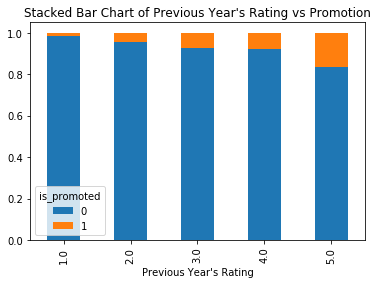

In [6]:
table=pd.crosstab(df['previous_year_rating'],df.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Previous Year\'s Rating vs Promotion')
plt.xlabel('Previous Year\'s Rating')

Text(0.5, 0, 'KPIs > 80%')

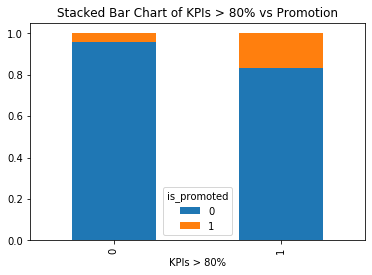

In [7]:
table=pd.crosstab(df['KPIs_met >80%'],df.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of KPIs > 80% vs Promotion')
plt.xlabel('KPIs > 80%')

Text(0.5, 0, 'Won Awards the Previous Year ')

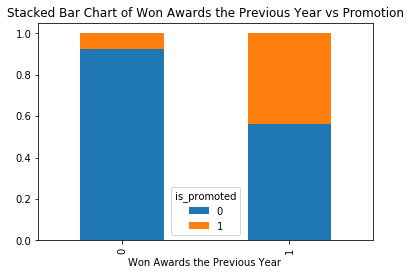

In [8]:
table=pd.crosstab(df['awards_won?'],df.is_promoted)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Won Awards the Previous Year vs Promotion')
plt.xlabel('Won Awards the Previous Year ')

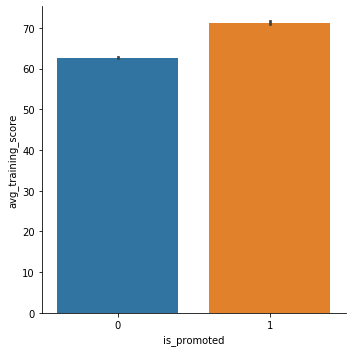

In [9]:
sns.catplot(x="is_promoted", y="avg_training_score", kind="bar", data=df)

In [10]:
df.groupby('gender').mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
gender,,,,,,,,,
f,39249.336439,1.173921,34.995647,3.376006,5.994421,0.379414,0.022621,63.889897,0.089934
m,39173.158484,1.286523,34.722672,3.309316,5.810889,0.340347,0.023405,63.173550,0.083151


In [11]:
df.groupby('recruitment_channel').mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
recruitment_channel,,,,,,,,,
other,39076.224430,1.259673,34.922486,3.311158,5.892991,0.349176,0.023845,63.362839,0.083952
referred,39237.518389,1.196147,32.591944,3.948393,4.979860,0.507881,0.026270,66.182137,0.120841
sourcing,39350.607666,1.247071,34.757235,3.323398,5.873040,0.347976,0.022136,63.280620,0.085013


In [12]:
df.groupby('department').mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,,,,,,,,,
Analytics,39107.191891,1.337818,32.431241,3.557307,4.932735,0.404148,0.024290,84.602952,0.095665
Finance,39927.936514,1.304022,32.058754,3.506436,4.819401,0.414826,0.027603,60.222003,0.081230
HR,40036.235318,1.053763,34.385856,3.482965,5.683623,0.334160,0.018610,50.018197,0.056245
Legal,38154.317613,1.089509,33.832531,3.405281,4.599615,0.333975,0.024062,59.868142,0.051011
Operations,39125.010575,1.160821,36.073669,3.632156,6.416020,0.430737,0.023088,60.226648,0.090148
Procurement,39510.594004,1.322779,35.899972,3.298852,6.331045,0.377557,0.023956,70.122443,0.096386
R&D,38242.011011,1.402402,32.842843,3.563596,4.554555,0.416416,0.021021,84.596597,0.069069
Sales & Marketing,39106.111995,1.277435,34.860629,3.067937,5.912292,0.265083,0.021437,50.261698,0.072031
Technology,39012.084477,1.260857,34.867190,3.158677,5.914822,0.344354,0.025918,79.928692,0.107593


In [13]:
df.groupby('education').mean()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
education,,,,,,,,,
Bachelor's,39154.777387,1.270883,33.445226,3.324302,5.344542,0.354496,0.023371,63.422046,0.082031
Below Secondary,38515.060870,1.275776,23.836025,3.493450,1.704348,0.400000,0.017391,64.925466,0.083230
Master's & above,39292.533735,1.219095,39.352630,3.362549,7.605293,0.360134,0.022982,64.061240,0.098559


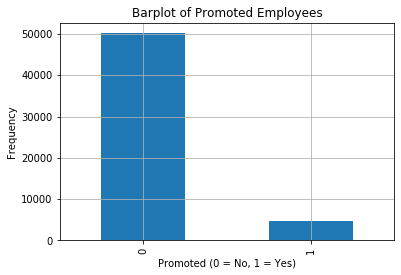

In [14]:
#There are more people that are not getting promoted than people who are getting promoted.
#This means that stratified sampling should be used.
df.is_promoted.value_counts().plot.bar()
plt.xlabel('Promoted (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.title('Barplot of Promoted Employees')
plt.grid(True)
plt.show()

### 1.2 Cleanse and Transform the data

In [15]:
df = df.drop(['employee_id'], axis = 1)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [16]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
df.dropna(subset=['previous_year_rating'], inplace=True)
#replace education with below secondary because it is the minimum education an employee would have.
df.education.fillna("Below Secondary", inplace=True)
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [18]:
df['gender'].value_counts()

m    35530
f    15154
Name: gender, dtype: int64

In [19]:
df['gender'] = df['gender'].map({'m': 1, 'f': 2}).astype(int)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,2,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,1,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,1,other,1,45,3.0,2,0,0,73,0


In [20]:
df['education'].value_counts()

Bachelor's          33404
Master's & above    14798
Below Secondary      2482
Name: education, dtype: int64

In [21]:
df['education'] = df['education'].map({'Below Secondary': 1, 'Bachelor\'s': 2, 'Master\'s & above': 3}).astype(int)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,3,2,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,2,1,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,2,1,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,2,1,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,2,1,other,1,45,3.0,2,0,0,73,0


In [22]:
df['department'].value_counts()

Sales & Marketing    15529
Operations           10760
Procurement           6709
Technology            6592
Analytics             4886
Finance               2253
HR                    2172
R&D                    912
Legal                  871
Name: department, dtype: int64

In [23]:
df['department'] = df['department'].map( {'Sales & Marketing': 1, 'Operations': 2, 'Procurement': 3,
                                          'Technology': 4, 'Analytics': 5, 'Finance': 6,
                                          'HR': 7, 'R&D': 8, 'Legal': 9} ).astype(int)

In [24]:
df['recruitment_channel'].value_counts()

other       28185
sourcing    21472
referred     1027
Name: recruitment_channel, dtype: int64

In [25]:
df['recruitment_channel'] = df['recruitment_channel'].map({'other': 1, 'sourcing': 2, 'referred':3}).astype(int)

In [26]:
df['region'].value_counts()

region_2     11535
region_22     5684
region_7      4585
region_15     2690
region_13     2510
region_26     2047
region_31     1772
region_4      1628
region_27     1490
region_16     1354
region_28     1219
region_11     1211
region_23     1130
region_29      905
region_19      848
region_32      840
region_14      785
region_20      780
region_25      752
region_17      750
region_5       695
region_10      618
region_30      614
region_8       589
region_6       589
region_1       565
region_24      462
region_12      427
region_21      377
region_9       364
region_3       332
region_33      260
region_34      253
region_18       24
Name: region, dtype: int64

In [27]:
df["region"] = df["region"].astype('category')
df["region"] = df["region"].cat.codes

In [28]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,31,3,2,2,1,35,5.0,8,1,0,49,0
1,2,14,2,1,1,1,30,5.0,4,0,0,60,0
2,1,10,2,1,2,1,34,3.0,7,0,0,50,0
3,1,15,2,1,1,2,39,1.0,10,0,0,50,0
4,4,18,2,1,1,1,45,3.0,2,0,0,73,0


In [29]:
df['is_promoted'].value_counts()

0    46355
1     4329
Name: is_promoted, dtype: int64

In [30]:
df1=df[df['is_promoted']==1]
df0=df[df['is_promoted']==0]

In [31]:
df0_sampled = df0.sample(n=len(df1), random_state=2).copy()

In [32]:
df=pd.concat([df1,df0_sampled],axis=0)
df['is_promoted'].value_counts()

1    4329
0    4329
Name: is_promoted, dtype: int64

### 1.3 Correlation Analysis

In [33]:
df.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.000000,0.038139,-0.000678,-0.010626,0.028631,0.023849,-0.129121,0.062246,-0.108277,0.031644,0.004299,0.443619,0.001189
region,0.038139,1.000000,0.014251,-0.012114,-0.024373,-0.013161,-0.073224,0.008487,-0.050772,0.025394,0.008750,0.023146,0.021459
education,-0.000678,0.014251,1.000000,0.042626,-0.015447,-0.014661,0.367696,0.020830,0.238530,0.011428,0.008170,0.052094,0.056828
gender,-0.010626,-0.012114,0.042626,1.000000,-0.016877,-0.058737,0.021128,0.019019,0.026041,0.016840,-0.008145,0.028560,0.022785
recruitment_channel,0.028631,-0.024373,-0.015447,-0.016877,1.000000,-0.013594,-0.047140,0.019143,-0.023846,0.025491,-0.005679,0.022628,0.018509
no_of_trainings,0.023849,-0.013161,-0.014661,-0.058737,-0.013594,1.000000,-0.064647,-0.056200,-0.026961,-0.042390,-0.022645,0.048194,-0.047969
age,-0.129121,-0.073224,0.367696,0.021128,-0.047140,-0.064647,1.000000,-0.005662,0.620452,-0.050616,-0.013337,-0.057515,-0.033802
previous_year_rating,0.062246,0.008487,0.020830,0.019019,0.019143,-0.056200,-0.005662,1.000000,-0.017711,0.289384,0.058980,0.122510,0.302577
length_of_service,-0.108277,-0.050772,0.238530,0.026041,-0.023846,-0.026961,0.620452,-0.017711,1.000000,-0.071732,-0.070255,-0.050756,-0.022705
KPIs_met >80%,0.031644,0.025394,0.011428,0.016840,0.025491,-0.042390,-0.050616,0.289384,-0.071732,1.000000,0.042615,0.021647,0.378445


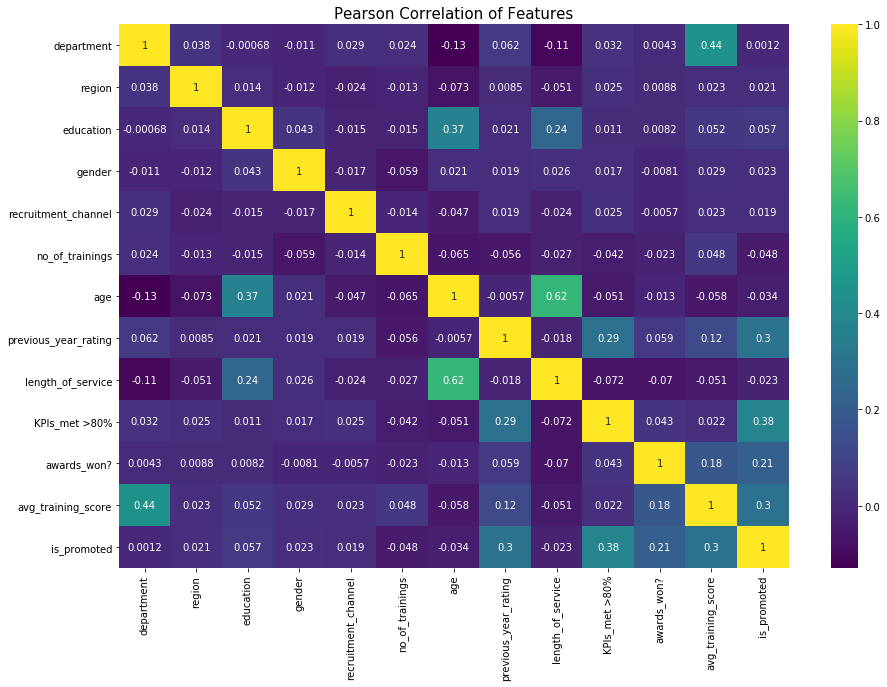

In [34]:
# Heatmap: the correlation between any two features/variables
#while some variables may have negative correlation, i do not want to drop it yet until i begin the modelling process
colormap = plt.cm.viridis
plt.figure(figsize=(15,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 1.4 Export the data

In [35]:
df.to_csv('hr_data_new.csv', index=False)

## 2. Airbnb Singapore

### 2.1 Load and Explore the data

In [36]:
df = pd.read_csv("listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

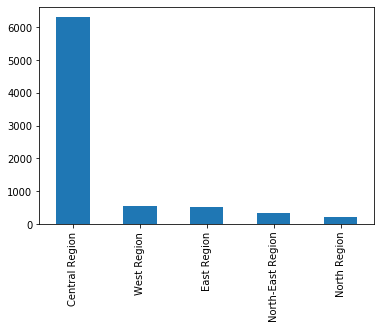

In [38]:
#shows that the data set generally contains data for central region. perhaps could focus solely on central region.
df.neighbourhood_group.value_counts().plot.bar()

Text(0, 0.5, 'Average Price')

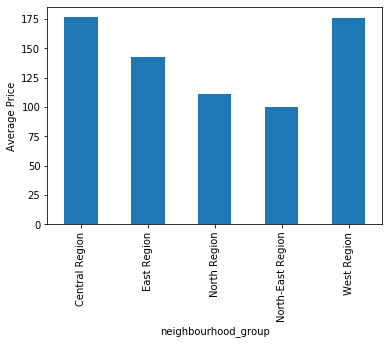

In [39]:
df.groupby('neighbourhood_group').price.mean().plot.bar()
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

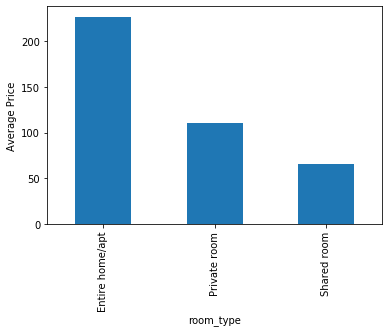

In [40]:
df.groupby('room_type').price.mean().plot.bar()
plt.ylabel('Average Price')

Text(0.5, 1.0, 'Price vs Number of Reviews')

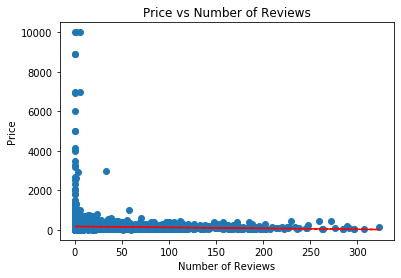

In [41]:
#Shows the relationship between pricing and no of reviews. it shows that more reviews does not equal to higher pricing.
x = df['number_of_reviews']
y = df['price']
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Price vs Number of Reviews')

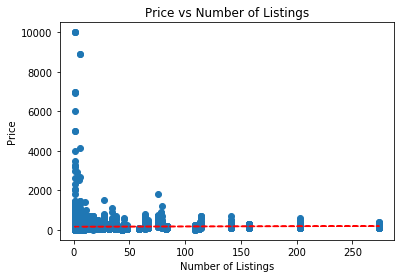

In [42]:
#it shows that a host may have a lot of listings but it does not equate to higher listing prices.
#also shows that there are outliers in the price variable. perhaps i could consider removing them
x = df['calculated_host_listings_count']
y = df['price']
plt.xlabel('Number of Listings')
plt.ylabel('Price')
plt.title('Price vs Number of Listings')
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

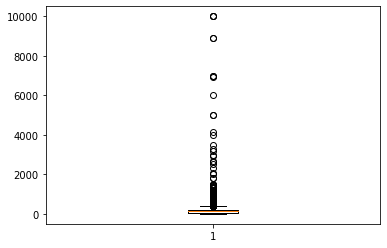

In [43]:
plt.boxplot(df["price"])
plt.show()

### 2.2 Cleanse and Transform the data

In [44]:
df = df[df['neighbourhood_group'] == "Central Region"]
df.neighbourhood_group.value_counts()

Central Region    6309
Name: neighbourhood_group, dtype: int64

In [45]:
priceMax = df.price.max()
df[df['price'] == priceMax]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5823,32026675,Testing,20307016,David,Central Region,Kallang,1.2961,103.86613,Private room,10000,1,0,NaN,NaN,1,0


In [46]:
Q1 = df['price'].describe().loc['25%']
Q3 = df['price'].describe().loc['75%']
IQR = Q3-Q1
Maximum = Q3 + 1.5 * IQR
outliers = []
for x in df['price']:
    if (x>Maximum):
        outliers.append(x)
print("Number of outliers", len(outliers))
print("Number of records", len(df['price']))

Number of outliers 314
Number of records 6309


In [47]:
df = df[df['price'] <= Maximum]
print("Number of records", len(df['price']))

Number of records 5995


In [48]:
df.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2022
reviews_per_month                 2022
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [49]:
df.dropna(subset=['last_review'], inplace=True)
df.dropna(subset=['reviews_per_month'], inplace=True)
df.dropna(subset=['name'], inplace=True)
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [50]:
#split the last review variable into 3 different variables so that it could be used for the correlation calculation.
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review_year'] = df['last_review'].dt.year
df['last_review_month'] = df['last_review'].dt.month
df['last_review_day'] = df['last_review'].dt.day

In [51]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365,2014,12,26
10,275343,Conveniently located City Room!( (Phone number...,1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28875,103.80814,Private room,44,15,18,2019-04-21,0.23,32,331,2019,4,21
11,275344,15 mins to Outram MRT Single Room (B),1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28837,103.81099,Private room,40,30,10,2018-09-13,0.11,32,276,2018,9,13
13,294281,5 mins walk from Newton subway,1521514,Elizabeth,Central Region,Newton,1.31125,103.83816,Private room,65,2,125,2019-08-22,1.35,6,336,2019,8,22
14,324945,20 Mins to Sentosa @ Hilltop ! (8),1439258,K2 Guesthouse,Central Region,Bukit Merah,1.28976,103.80896,Private room,44,30,13,2019-02-02,0.15,32,340,2019,2,2


In [52]:
#Drop the irrelevant features. I am dropping neighbourhood group variable since all of these data are from central region.
df = df.drop(['name', 'id', 'host_id', 'host_name', 'neighbourhood_group', 'last_review'], axis = 1)

In [53]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
1,Bukit Timah,1.33235,103.78521,Private room,81,90,18,0.28,1,365,2014,12,26
10,Bukit Merah,1.28875,103.80814,Private room,44,15,18,0.23,32,331,2019,4,21
11,Bukit Merah,1.28837,103.81099,Private room,40,30,10,0.11,32,276,2018,9,13
13,Newton,1.31125,103.83816,Private room,65,2,125,1.35,6,336,2019,8,22
14,Bukit Merah,1.28976,103.80896,Private room,44,30,13,0.15,32,340,2019,2,2


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3972 entries, 1 to 7766
Data columns (total 13 columns):
neighbourhood                     3972 non-null object
latitude                          3972 non-null float64
longitude                         3972 non-null float64
room_type                         3972 non-null object
price                             3972 non-null int64
minimum_nights                    3972 non-null int64
number_of_reviews                 3972 non-null int64
reviews_per_month                 3972 non-null float64
calculated_host_listings_count    3972 non-null int64
availability_365                  3972 non-null int64
last_review_year                  3972 non-null int64
last_review_month                 3972 non-null int64
last_review_day                   3972 non-null int64
dtypes: float64(3), int64(8), object(2)
memory usage: 434.4+ KB


In [55]:
df['room_type'].value_counts()

Entire home/apt    2250
Private room       1464
Shared room         258
Name: room_type, dtype: int64

In [56]:
df['room_type'] = df['room_type'].map({'Shared room': 1, 'Private room': 2, 'Entire home/apt': 3,}).astype(int)

In [57]:
df['neighbourhood'].value_counts()

Kallang             674
Geylang             628
Rochor              341
Outram              338
Novena              309
River Valley        257
Downtown Core       256
Bukit Merah         256
Queenstown          149
Marine Parade       132
Tanglin             130
Singapore River     100
Bukit Timah          89
Orchard              87
Newton               85
Toa Payoh            62
Museum               44
Bishan               33
Southern Islands      2
Name: neighbourhood, dtype: int64

In [58]:
#use label encoding because neighbourhood has too many unique values to manually map.
df["neighbourhood"] = df["neighbourhood"].astype('category')
df["neighbourhood"] = df["neighbourhood"].cat.codes
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
1,2,1.33235,103.78521,2,81,90,18,0.28,1,365,2014,12,26
10,1,1.28875,103.80814,2,44,15,18,0.23,32,331,2019,4,21
11,1,1.28837,103.81099,2,40,30,10,0.11,32,276,2018,9,13
13,8,1.31125,103.83816,2,65,2,125,1.35,6,336,2019,8,22
14,1,1.28976,103.80896,2,44,30,13,0.15,32,340,2019,2,2


In [59]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
1,2,1.33235,103.78521,2,81,90,18,0.28,1,365,2014,12,26
10,1,1.28875,103.80814,2,44,15,18,0.23,32,331,2019,4,21
11,1,1.28837,103.81099,2,40,30,10,0.11,32,276,2018,9,13
13,8,1.31125,103.83816,2,65,2,125,1.35,6,336,2019,8,22
14,1,1.28976,103.80896,2,44,30,13,0.15,32,340,2019,2,2


### 2.3 Correlation Analysis

In [60]:
df.corr()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day
neighbourhood,1.000000,-0.081670,-0.282310,-0.070194,-0.005897,-0.019421,0.037829,0.012337,-0.075767,0.052374,0.023783,0.012496,-0.004844
latitude,-0.081670,1.000000,0.315172,0.059543,-0.046835,-0.037271,0.018295,-0.008057,0.061466,-0.036968,-0.026234,0.018227,-0.004125
longitude,-0.282310,0.315172,1.000000,0.101472,-0.005041,-0.091432,0.094607,0.102057,0.123024,-0.086138,0.076990,0.022041,-0.014882
room_type,-0.070194,0.059543,0.101472,1.000000,0.614185,0.009486,-0.013491,0.041348,0.262036,-0.149032,0.099906,-0.018415,-0.009346
price,-0.005897,-0.046835,-0.005041,0.614185,1.000000,-0.064128,-0.045683,0.057011,0.136938,0.024786,0.085186,-0.005326,-0.002773
minimum_nights,-0.019421,-0.037271,-0.091432,0.009486,-0.064128,1.000000,-0.080357,-0.163793,0.078513,0.104736,-0.214970,-0.024750,0.010904
number_of_reviews,0.037829,0.018295,0.094607,-0.013491,-0.045683,-0.080357,1.000000,0.620767,-0.187075,-0.072431,0.201892,0.136839,-0.032924
reviews_per_month,0.012337,-0.008057,0.102057,0.041348,0.057011,-0.163793,0.620767,1.000000,-0.233440,-0.123536,0.349285,0.219976,0.011763
calculated_host_listings_count,-0.075767,0.061466,0.123024,0.262036,0.136938,0.078513,-0.187075,-0.233440,1.000000,0.242063,0.100957,-0.121255,0.014157
availability_365,0.052374,-0.036968,-0.086138,-0.149032,0.024786,0.104736,-0.072431,-0.123536,0.242063,1.000000,0.173716,-0.024537,-0.006885


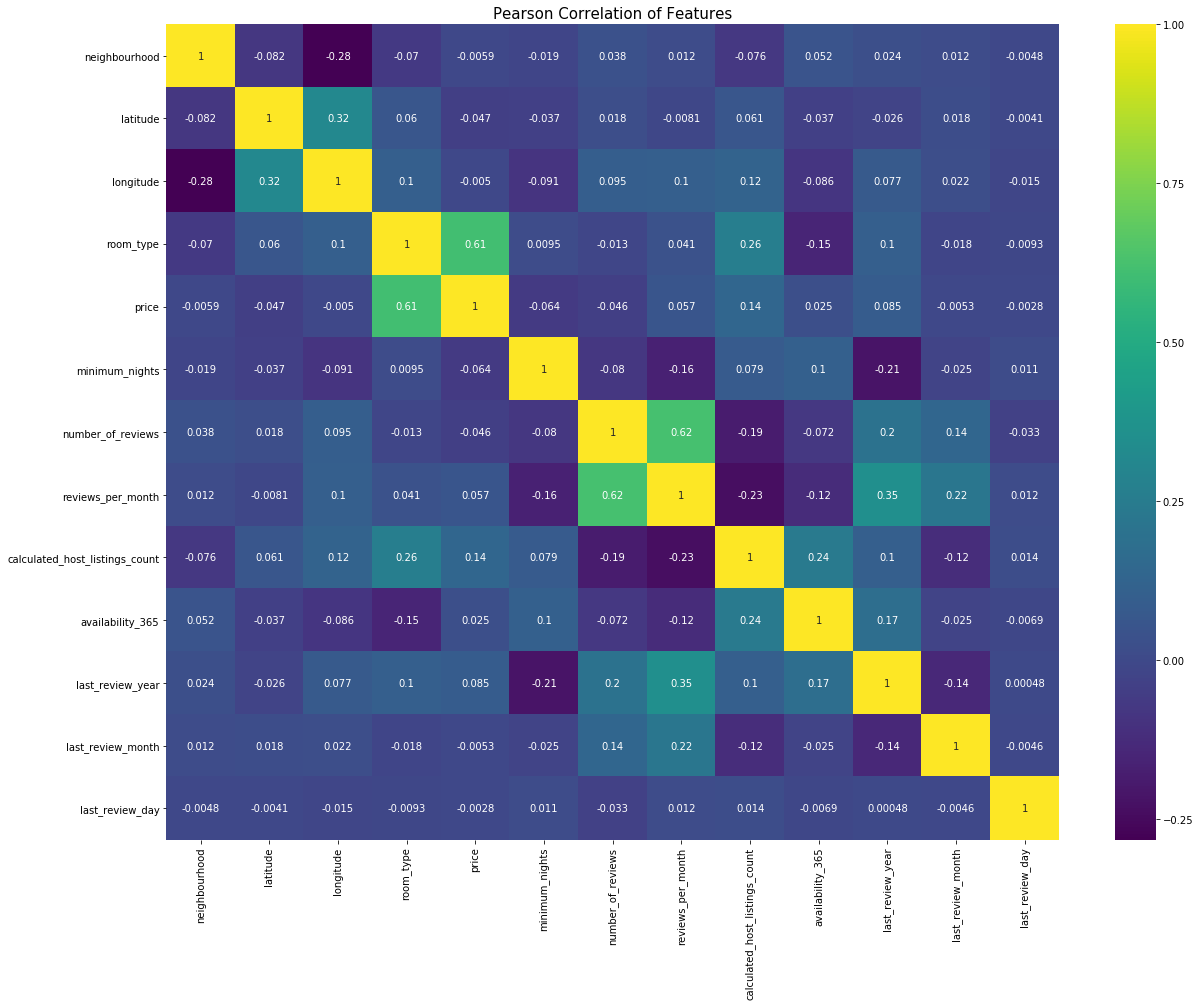

In [61]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 2.4 Export the data

In [62]:
df.to_csv('listing_new.csv', index=False)